In [19]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk


redwine = pd.read_csv('winequality-red.csv', sep=';')
redwine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [20]:
# make a copy of the data

redwine_copy = redwine.copy() 

#create a new column called 'quality_label' and assign the value based on the 'quality' column  value
# 0-4 = 'low'   5-6 = 'medium'   7-10 = 'high'  
redwine_copy['quality_label'] = redwine_copy['quality'].apply(lambda value: 'low' if value <= 4 else 'medium' if value <= 6 else 'high')

redwine_copy.head()

#coun the number of each quality label
redwine_copy['quality_label'].value_counts()

quality_label
medium    1319
high       217
low         63
Name: count, dtype: int64

In [21]:
#drop the 'quality' column
redwine_copy = redwine_copy.drop(columns='quality')

In [22]:
from sklearn.preprocessing import OrdinalEncoder

# Create encoder for quality
ord_encoder = OrdinalEncoder(categories=[["low", "medium", "high"]])  

# Create new column for encoded quality values
redwine_copy['quality_label_encoded'] = ord_encoder.fit_transform(
redwine_copy[['quality_label']]
)


print("Original quality labels:", redwine_copy['quality_label'].unique())
print("Encoded quality labels:", redwine_copy['quality_label_encoded'].unique())

Original quality labels: ['medium' 'high' 'low']
Encoded quality labels: [1. 2. 0.]


Split the Data

Accuracy: 0.865625

Classification Report:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        11
         1.0       0.89      0.96      0.92       262
         2.0       0.70      0.55      0.62        47

    accuracy                           0.87       320
   macro avg       0.53      0.50      0.51       320
weighted avg       0.83      0.87      0.85       320



/opt/anaconda3/envs/CAB_V1/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/CAB_V1/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/CAB_V1/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


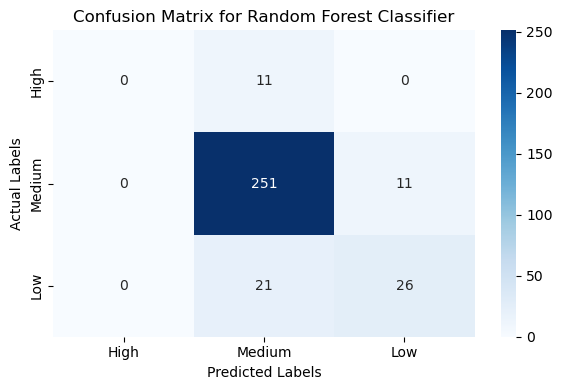

In [23]:
# Import necessary libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare features and target
X = redwine_copy.drop(['quality_label', 'quality_label_encoded'], axis=1)
y = redwine_copy['quality_label_encoded']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
predictions = rf_model.predict(X_test)

# Evaluate model
print(f"Accuracy: {accuracy_score(y_test, predictions)}")
print("\nClassification Report:")
print(classification_report(y_test, predictions))

# Create and visualize confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, 
            annot=True, 
            fmt='d', 
            cmap='Blues', 
            xticklabels=['High', 'Medium', 'Low'],
            yticklabels=['High', 'Medium', 'Low'])
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.tight_layout()

In [24]:
#print the classification report
print(classification_report(y_test, preds))

#print confusion matrix
print(conf_matrix)

#print accuracy
print(acc)

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        11
         1.0       0.89      0.96      0.92       262
         2.0       0.70      0.55      0.62        47

    accuracy                           0.87       320
   macro avg       0.53      0.50      0.51       320
weighted avg       0.83      0.87      0.85       320

[[  0  11   0]
 [  0 251  11]
 [  0  21  26]]
0.865625


/opt/anaconda3/envs/CAB_V1/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/CAB_V1/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/CAB_V1/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy Score: 0.8562

Classification Report:
              precision    recall  f1-score   support

         0.0       0.29      0.36      0.32        11
         1.0       0.95      0.87      0.91       262
         2.0       0.64      0.87      0.74        47

    accuracy                           0.86       320
   macro avg       0.62      0.70      0.66       320
weighted avg       0.88      0.86      0.86       320



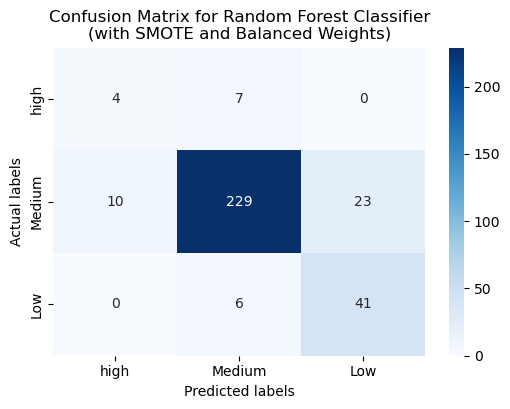

In [26]:
#importing necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Initialize the model with improved parameters
RF_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=2,
    class_weight='balanced',
    random_state=42
)

# Fit the model on balanced data
RF_model.fit(X_train_balanced, y_train_balanced)

# Prediction
preds = RF_model.predict(X_test)

# Calculate and print accuracy
acc = accuracy_score(y_test, preds)
print(f"Accuracy Score: {acc:.4f}")

# Print detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, preds))

# Create and plot confusion matrix
conf_matrix = confusion_matrix(y_test, preds)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, 
            annot=True, 
            fmt='d', 
            cmap='Blues', 
            xticklabels=['high', 'Medium', 'Low'],
            yticklabels=['high', 'Medium', 'Low'])
plt.xlabel('Predicted labels')
plt.ylabel('Actual labels')
plt.title('Confusion Matrix for Random Forest Classifier\n(with SMOTE and Balanced Weights)')
plt.show()
